Loading the fule and dataset

In [24]:
data(iris)
dataset <- iris

Creating the validation dataset

In [25]:
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
validation <- dataset[-validation_index,]
dataset <- dataset[validation_index,]

Dimensions of the dataset

In [26]:
dim(dataset)

[1] 120   5

Classes of the dataset

In [27]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

Head of the dataset

In [28]:
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


Levels of the 'factor'

In [30]:
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

Number of rows each variable has

In [34]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


Summary statistics of the dataset

In [36]:
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.075   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.863   Mean   :3.041   Mean   :3.751   Mean   :1.188  
 3rd Qu.:6.500   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

Set x and y variables

In [37]:
x <- dataset[,1:4]
y <- dataset[,5]

Box and whisker plots of each variable

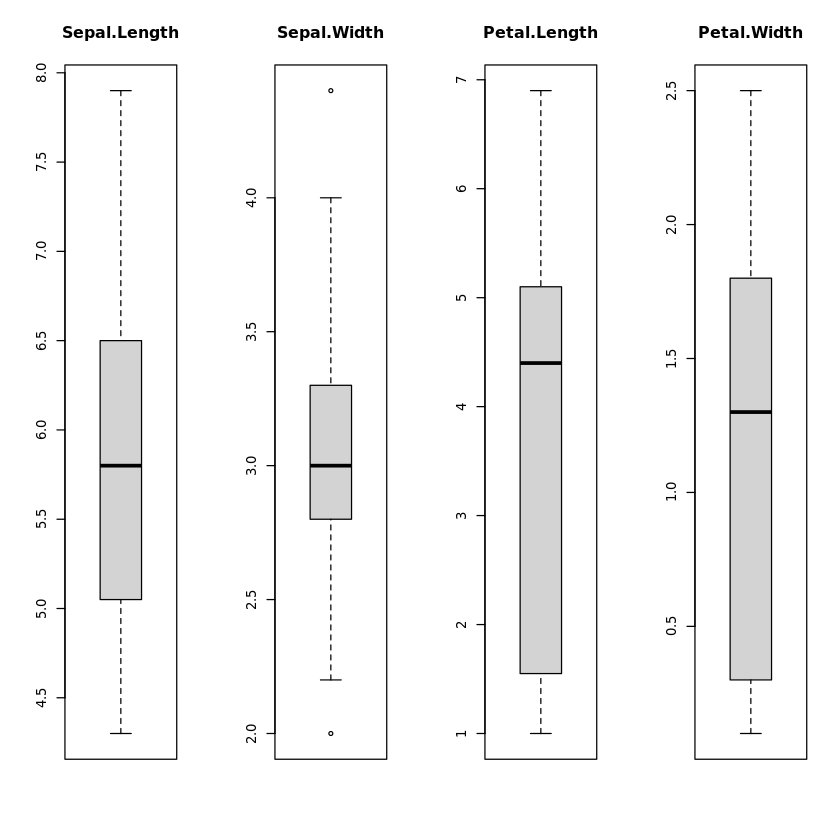

In [39]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

Comfirming the data is evenly distributed throughout each variable

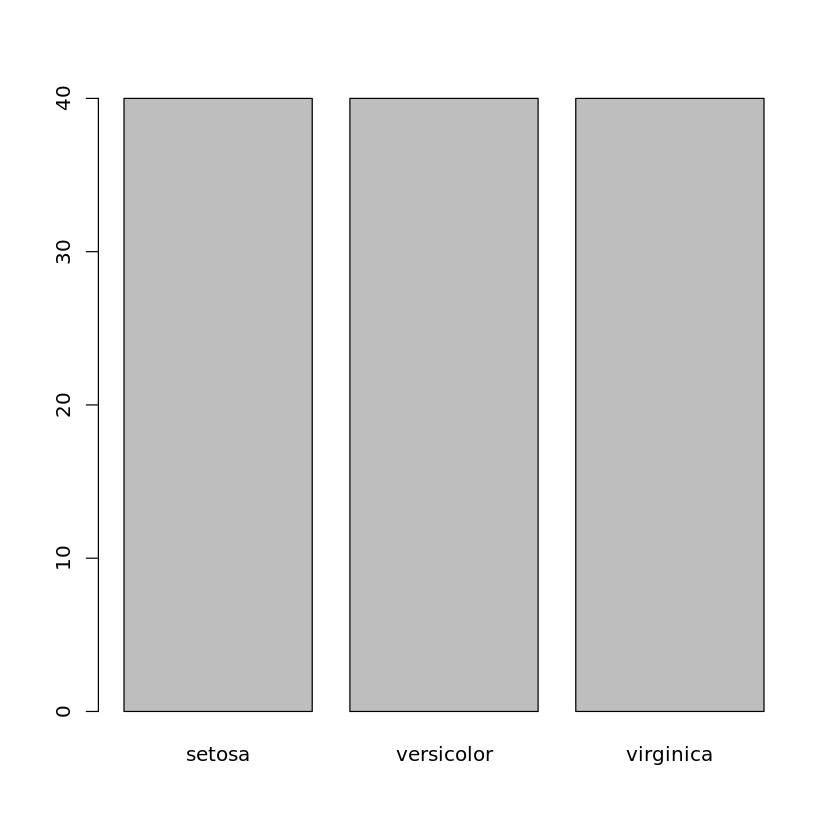

In [41]:
plot(y)

Scatterplot matrix to analyze relationships between variables

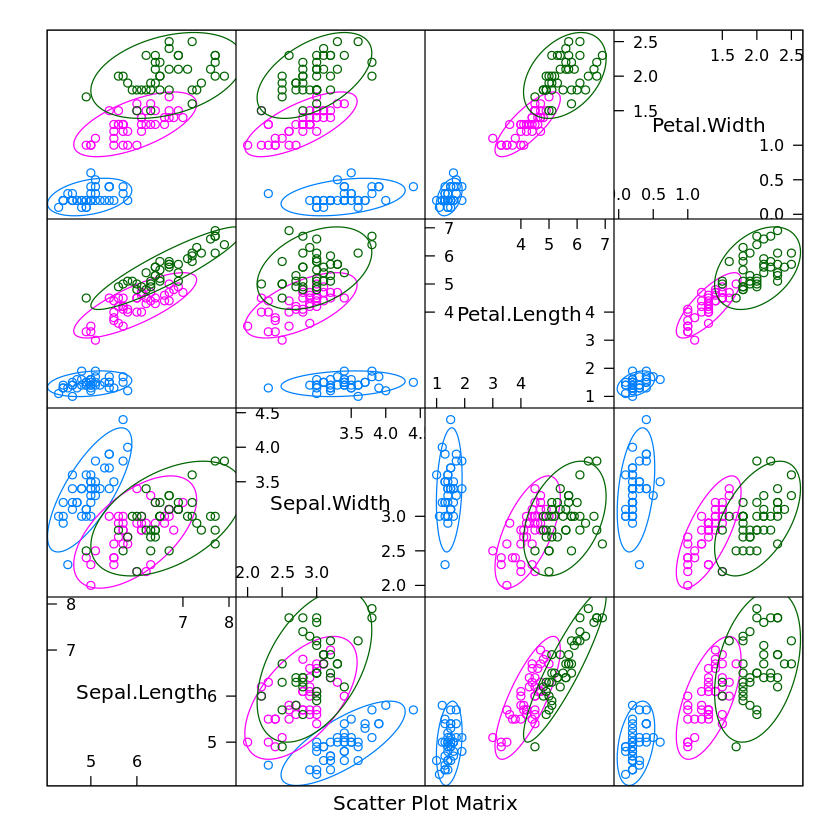

In [43]:
featurePlot(x=x, y=y, plot="ellipse")

Box and whisker plot matrix to analyze relationships between variables

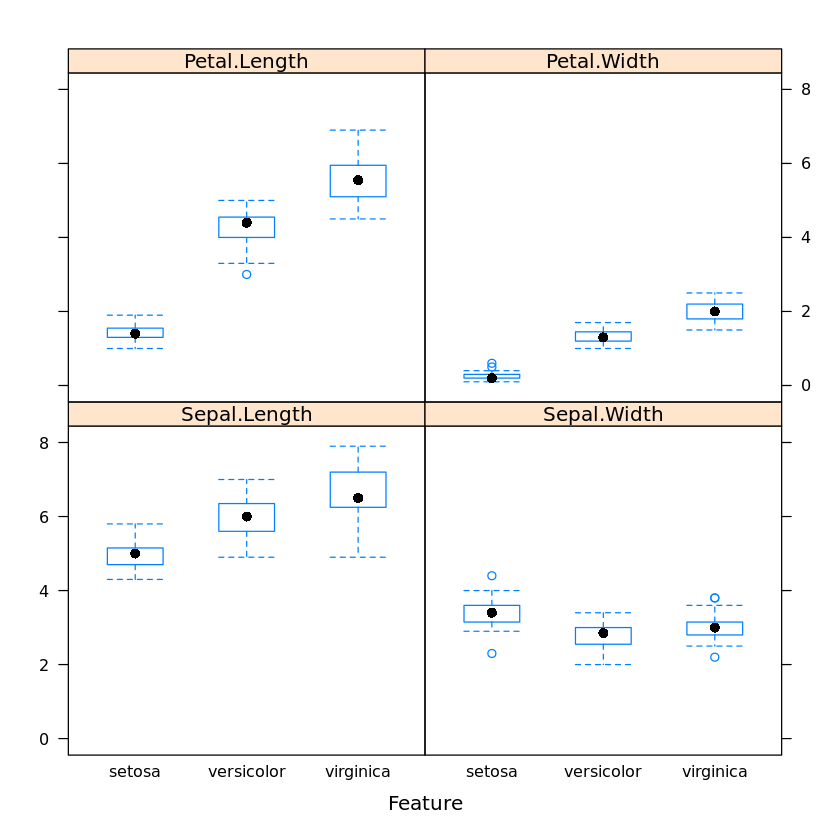

In [44]:
featurePlot(x=x, y=y, plot="box")

Density plot matrix to analyze relationships between variables

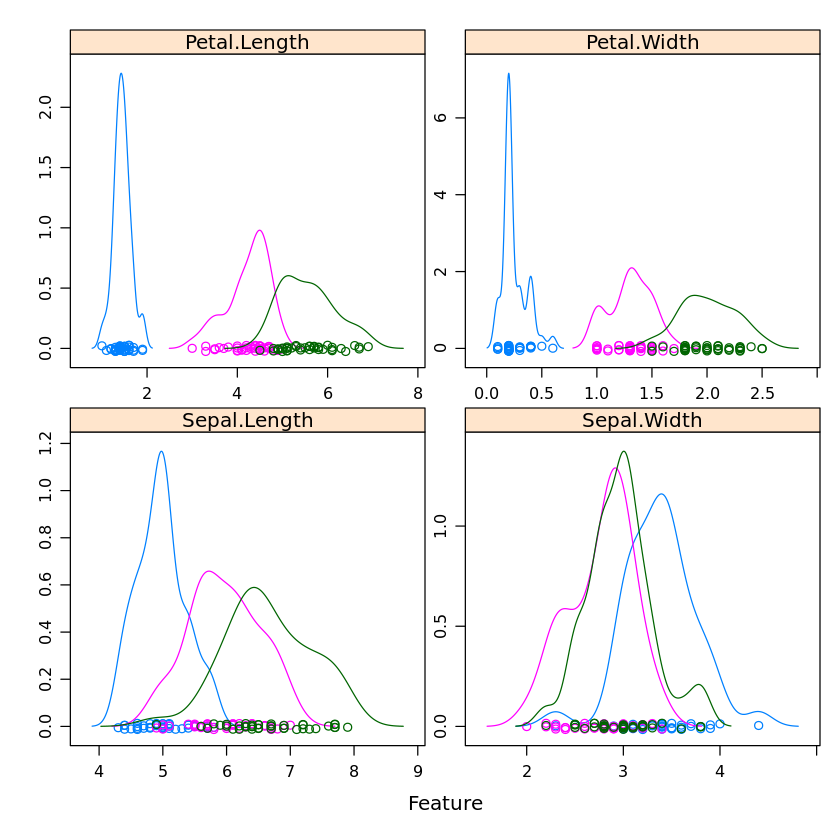

In [45]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

Validating accuracy of predictions

In [48]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

Running several algorithms

In [49]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

Comparing accuracy between each model

In [50]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333       1    1    0
cart 0.8333333 0.9166667 0.9166667 0.9416667       1    1    0
knn  0.9166667 1.0000000 1.0000000 0.9916667       1    1    0
svm  0.9166667 0.9166667 0.9583333 0.9583333       1    1    0
rf   0.9166667 0.9375000 1.0000000 0.9750000       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 1.00000 1.0000 0.9750       1    1    0
cart 0.750 0.87500 0.8750 0.9125       1    1    0
knn  0.875 1.00000 1.0000 0.9875       1    1    0
svm  0.875 0.87500 0.9375 0.9375       1    1    0
rf   0.875 0.90625 1.0000 0.9625       1    1    0


Plot comparing accuracy of each algorithm

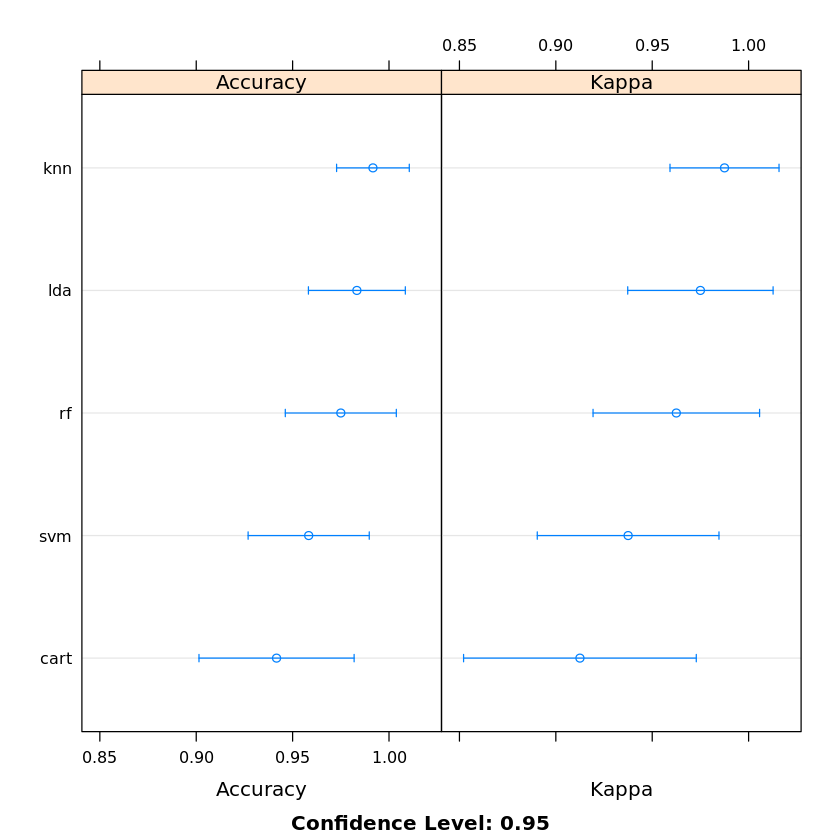

In [51]:
dotplot(results)

Summary of plot directly above

In [52]:
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



Analyzing the accuracy of the model of just the validation set

In [53]:
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          8         0
  virginica       0          2        10

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.747e-12       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8000           1.0000
Specificity                 1.0000            1.0000           0.9000
Pos Pred Value              1.0000            1.0000           0.8333
Neg Pred Value              1.0000            0.9091           1.0000
P